In [1]:
# import all modules needed
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from numpy.random import seed
import tensorflow as tf
seed(1234)
tf.random.set_seed(seed = 1234)
import tensorflow_hub as hub


In [2]:
# import pre-processed csv data
pr_train = pd.read_csv('preprocessedTrain.csv')
pr_test = pd.read_csv('preprocessedTest.csv')

In [3]:
# drop rows with NaN in cleaned_review to prevent errors
pr_train = pr_train.dropna(subset=['cleaned_review'])
pr_test = pr_test.dropna(subset=['cleaned_review'])

In [4]:
# get targets
y_train = pr_train['rating']
y_test = pr_test['rating']

In [5]:
# neural network
nn_module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
nn_model = hub.load(nn_module_url)


In [6]:
# function to embed text using model
def embed_text(text):
    vectors = nn_model(text)
    return vectors.numpy()

# get predictors
X_train = embed_text(list(pr_train['cleaned_review']))
X_test = embed_text(list(pr_test['cleaned_review']))

print("DONE VECTORIZING")

DONE VECTORIZING


In [7]:
# train model RandomForest
from sklearn.ensemble import RandomForestClassifier
classifier1 = RandomForestClassifier(random_state=42, n_estimators=500, n_jobs=5)
x1 = X_train
y1 = y_train
classifier1.fit(x1, y1)

# prediction and evaluation RandomForest
y_pred1 = classifier1.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred1)
rsq1 = classifier1.score(X_test,y_test)

print(f"RandomForest Accuracy: {accuracy1} \n")
print(f"Coefficient of determination: {rsq1} \n")

print("DONE WITH RANDOMFOREST CLASSIFIER")

RandomForest Accuracy: 0.7464885680799211 

Coefficient of determination: 0.7464885680799211 

DONE WITH RANDOMFOREST CLASSIFIER


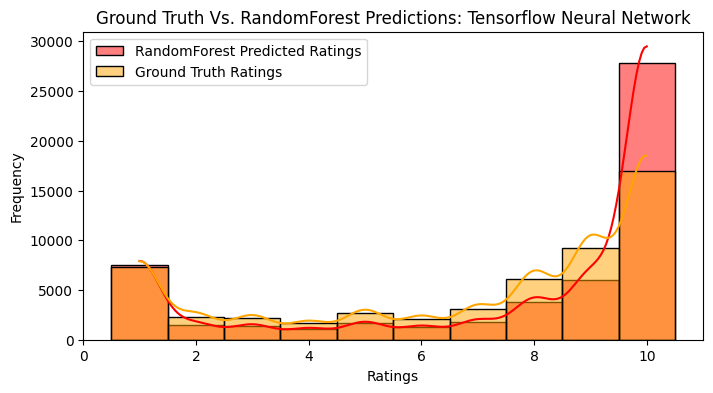

In [8]:
# get distribution of predicted vs actual ratings
# function to calculate bins centered on integer values
def get_bins(yarray):
    # calculate min and max value
    minv1 = yarray.min()
    maxv1 = yarray.max()
    # generate bins centered on integer values
    return np.arange(minv1, maxv1 + 2) - 0.5

# calculate bins
bins_pred1 = get_bins(y_pred1)
bins_test = get_bins(y_test)

# histograms
plt.figure(figsize=(8, 4))
sns.histplot(y_pred1, color="red", label="RandomForest Predicted Ratings", bins=bins_pred1, alpha=0.5, kde=True)
sns.histplot(y_test, color="orange", label="Ground Truth Ratings", bins=bins_test, alpha=0.5, kde=True)
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.title("Ground Truth Vs. RandomForest Predictions: Tensorflow Neural Network")
plt.legend()
plt.show()

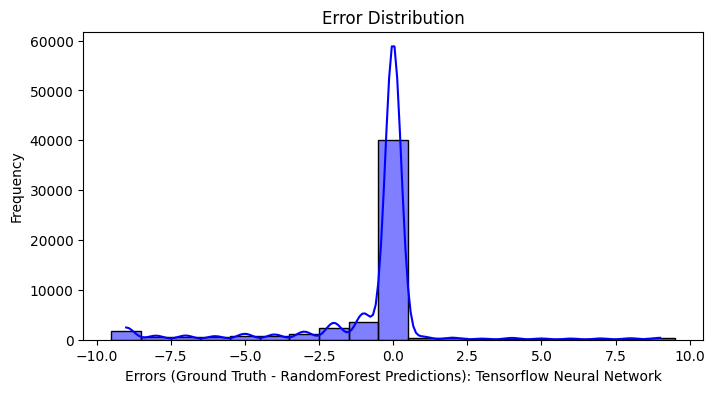

In [9]:
# calculate diff between ground truth scores and predictions (errors)
errors = y_test - y_pred1

# calculate bins
bins_err = get_bins(errors)

# histogram of errors
plt.figure(figsize=(8, 4))
sns.histplot(errors, color="blue", bins=bins_err, kde=True)
plt.xlabel("Errors (Ground Truth - RandomForest Predictions): Tensorflow Neural Network")
plt.ylabel("Frequency")
plt.title("Error Distribution")
plt.show()